<a href="https://colab.research.google.com/github/Ppcat99/Data-Science_project_Parth-Patel/blob/main/ProjectNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Enable graphical display
%matplotlib inline

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
The Dataframe has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*  Numerical:
      - Integers: order_id, customer_id, food_preparation_time, and delivery_time
      - Float: cost_of_the_order
       

*   Non-numerical:
      - Object: restaurant_name, cuisine_type, day_of_the_week, and rating






In [6]:
# Replace the non given to NaN
df['rating'] = df['rating'].replace(['Not given'], 'NaN')

# Changing the data type
df.restaurant_name = df.restaurant_name.astype('category')
df.cuisine_type = df.cuisine_type.astype('category')
df.day_of_the_week = df.day_of_the_week.astype('category')

# See the datatype changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


In [7]:
# Checking the entries in the Rating Column
df['rating'].unique()

array(['NaN', '5', '3', '4'], dtype=object)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
According to this chart now we don't have any missing values or any null values that require any treatment. The biggest thing is wwe don not have reviews for all the orders so we have replaced the Column: 'Non given' with 0

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
We have 1898 observation, 25% of the observation costs 12.08 or below, we have no rating that means zero as per amendent done above take about 23 minutes or below to deliver, 50% have values below 14.14 cost, 4 rating, 27 food_prep_time, 25 delivery time. For 75%, cost_of_the_order was 22.29, 5 rating, food_prep_time was 31 and delivery_time was 28. At last max, cost_of_the_order was 35.41, rating was 5, food_prep_time was 35 and deilvery_time was 33.

Overally Min: 20 min, average: 27.37 min and the 35 min was max to prepare the food after the order was placed.

In [10]:
df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


# Observation:
1. The average cost of an order is 16.50, in average preparation time for an ordered food is 27.37 min and the average delivery time is 24.16 min.
2. According to this chart, IQR for the three variables, none of them have any outliers.
3. The Minimum, Average, and Maximum times it takes for food to be prepared are 20 min, 27.37 min, and 35 min.  

In [11]:
df.describe(include=['category','object'])

,restaurant_name,cuisine_type,day_of_the_week,rating
count,1898,1898,1898,1898
unique,178,14,2,4
top,Shake Shack,American,Weekend,NaN
freq,219,584,1351,736


Observation:
1. According to the data, there are 178 unique resturant names, 14 unique Cuisine Type, 2 unique Day of Week, and 4 unique Rating inputs.
2. The most repeated value of the variables Restaurant Name, Cuisine Type, Day of the Week and Rating are 'Shake Shack', 'American', 'Weekend', and 'Not given' which is changed to 'NaN'.

### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
# Write the code here
df['rating'].value_counts(dropna=False)

,count
rating,
NaN,736
5,588
4,386
3,188


#### Observations:
According to this chart, that we convert from 'Not given' to zero rating. So Count of Zero rating is 736 orders that were not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

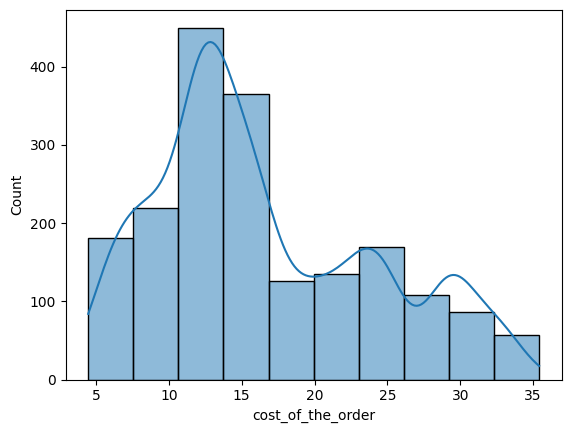

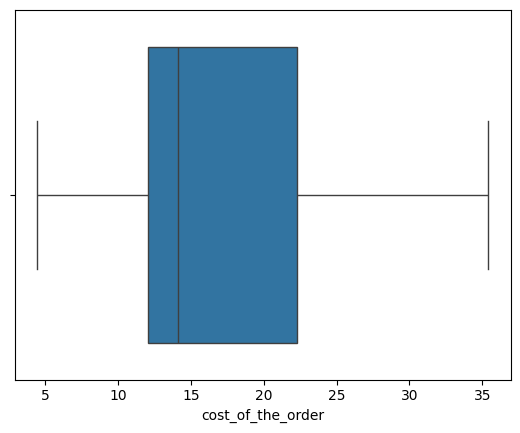

In [13]:
# Write the code here
# Histogram and Boxplot for cost_of_the_order
sns.histplot(data = df, x='cost_of_the_order', bins= 10, stat = 'count', kde = True)
plt.show()
sns.boxplot(data = df, x = 'cost_of_the_order')
plt.show();

# Observation on cost_of_orders:


*   If we look at the histogram which shows skewed toward the left, that means more customers buy cheeper cost of food. However, there is a slight peak at around 25 dollars.


*   If we look at the boxplot that indicates that medican is 14 dollars, with the orders being skrewed right. This implies a bigger spread above the median. Given that we have two main target markets students and working professionals. It would be good to note that even if the cause of the two peaks where probably the well-off professionals being right peak and student concetrated on the main and left peak lower prices.





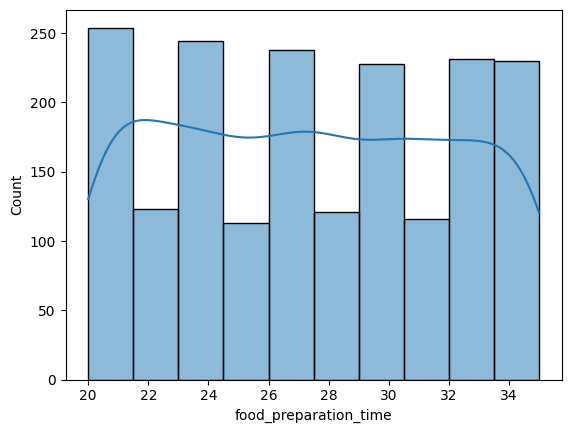

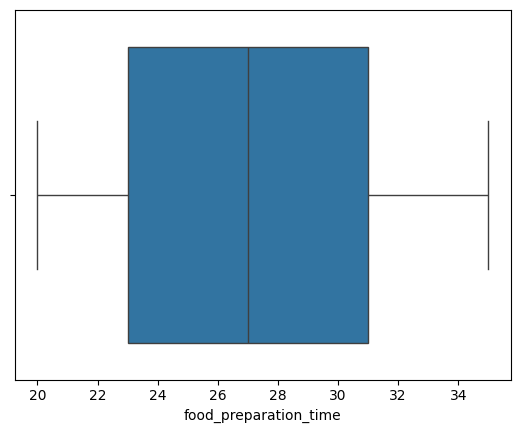

In [14]:
# Histogram and Boxplot for food_preparation_time
sns.histplot(data = df, x='food_preparation_time', bins= 10, stat = 'count', kde = True)
plt.show()
sns.boxplot(data = df, x = 'food_preparation_time')
plt.show();

# Observation for food_preparation_time:


*   This histogram is normally distributed evenly that means it is scatter between 20 min to 36 min, and median is 27 min.



/tmp/ipython-input-3468420069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x = 'cuisine_type', palette='Spectral')


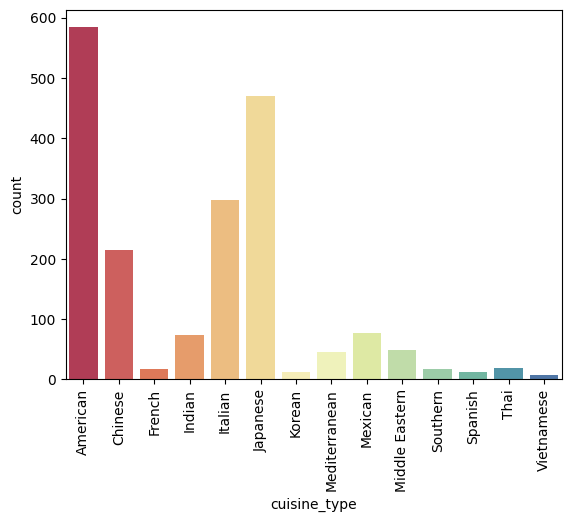

In [15]:
# Countplot for cuisine_type to determine most popular eaten food
sns.countplot(data=df, x = 'cuisine_type', palette='Spectral')
plt.xticks(rotation=90)
plt.show();

# Observation for cuisine_type


*   The most popular cuisine is American, Japanese, Italian, Chinese in those order, than followed by with a close margin of Mexican and Indian.



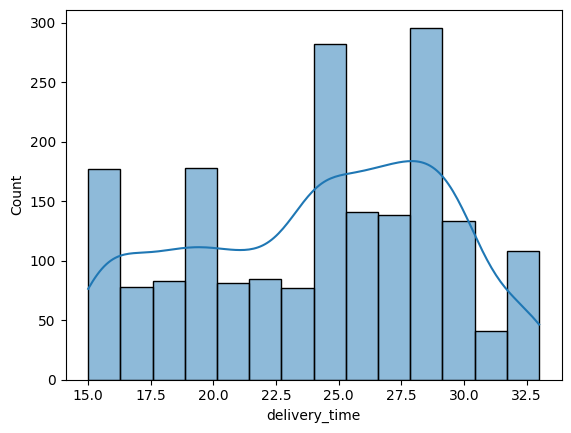

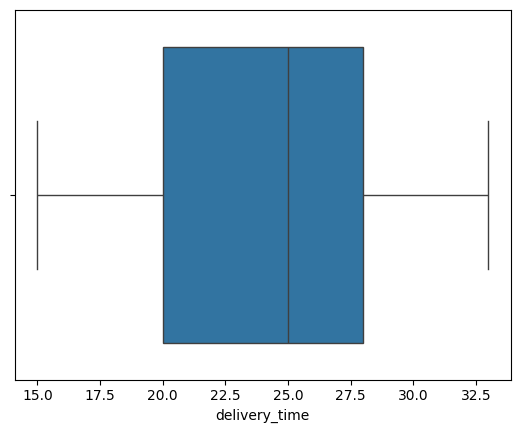

In [16]:
sns.histplot(data = df, x= 'delivery_time', stat = 'count', kde = True)
plt.show()
sns.boxplot(data = df, x = 'delivery_time')
plt.show();

# Observation for delivery_time


*   The median delivery time is about 25 minutes with the observation being left skewed. From the histogram, we can determine that most of the orders take between 25 to 28 min to be delivered.



/tmp/ipython-input-462901867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'day_of_the_week', palette='Spectral')


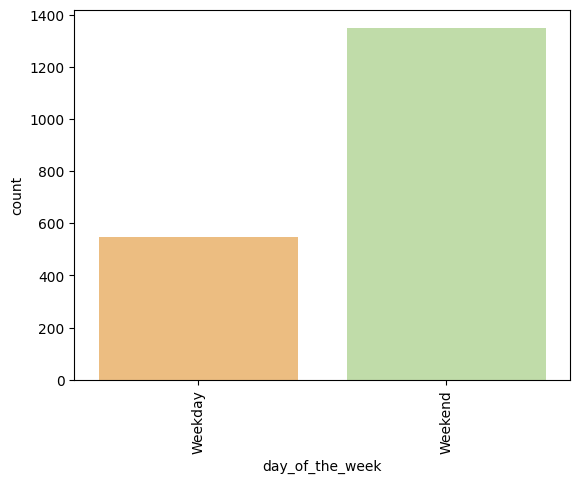

In [17]:
# Countplot to determine how much people are coming the weekend or weekday

sns.countplot(data = df, x = 'day_of_the_week', palette='Spectral')
plt.xticks(rotation=90)
plt.show()

# Observation for day_of_the_week:


*   According to this plot, there are more people coming to restaurant in the weekend because weekday they are at work.



/tmp/ipython-input-1898657967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['rating'] = df4['rating'].astype(int)


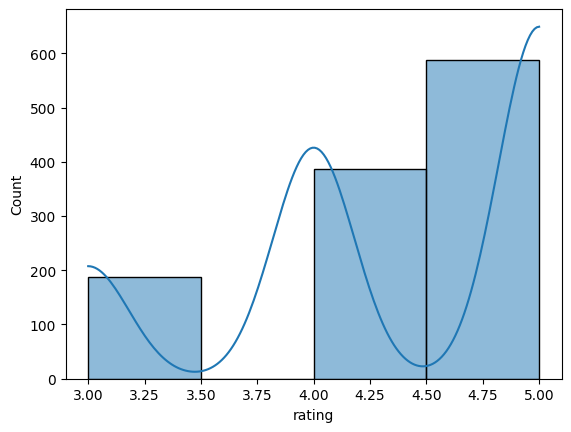

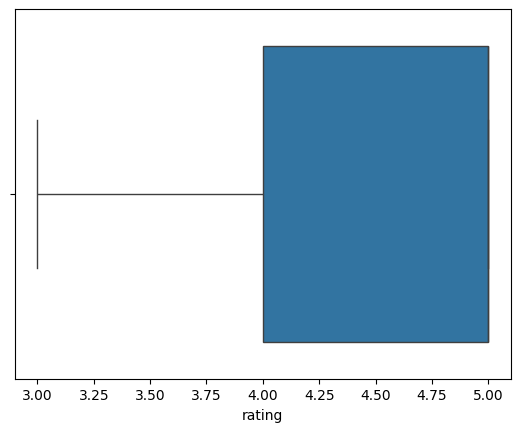

In [18]:
df['rating'] = df['rating'].replace('NaN', np.nan)
df4 = df.dropna(subset=['rating'])

df4['rating'] = df4['rating'].astype(int)

sns.histplot(data = df4, x = 'rating', bins = 4, stat = 'count', kde = True)
plt.show()
sns.boxplot(data = df4, x = 'rating')
plt.show()

# Observation about the Rating


*   For the rated orders, considering that these are about 38.77% unrated orders. the histplot shows that the ratings are concentrated around the maximum rating. But the boxplot is heavly skewed to the left such that we do not have the right whisker.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [19]:
# Write the code here
df[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id'
,axis = 0, ascending=False).head(5)


/tmp/ipython-input-269972847.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id'


,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:


*   Shake Shack is leading restaurant with 219 orders. The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm have 132, 119, 96, 68 orders respectively and together make up the top 5 resturants in term of orders processed.



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [20]:
# Write the code here
df[df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id'
,axis = 0, ascending = False).head(5)

/tmp/ipython-input-2606977555.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id'


,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,257,415,415
Japanese,335,335,335,335,335,199,335,335
Italian,207,207,207,207,207,110,207,207
Chinese,163,163,163,163,163,107,163,163
Mexican,53,53,53,53,53,32,53,53


#### Observations:


*   American Cuisine Type is the most popular during the weekends with the count of 415 orders.



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [21]:
# Write the code here
# count the total orders
total_observations = df['cost_of_the_order'].count()
# Count of orders above $20
orders_above20 = df['cost_of_the_order'][df['cost_of_the_order'] > 20].count()
# Percentage of orders above $20
percentage_above20 = round((orders_above20 / total_observations) * 100, 2)
percentage_above20

np.float64(29.24)

#### Observations:


*   29.24% of total orders cost more than $20



### **Question 10**: What is the mean order delivery time? [1 mark]

In [22]:
# Write the code here
avg_del_time = round(df[['delivery_time']].agg('mean'), 2)
avg_del_time

,0
delivery_time,24.16


#### Observations:


*   On average it takes 24.16 minutes to get the prepared orders delivered.



### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [23]:
# Write the code here
df[['order_id', 'customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',
axis = 0, ascending = False).head(10)

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
276192,7
259341,7
82041,7
65009,7
275689,6


#### Observations:

*   According to this chart of top 10 frequent customers who got the 20% discount volchers, their is lie for four clints with the 5th highest order count. The customer may use the total amount spend by those customers or other, to be a tie breaker or making a decision to how to address the multiple customers with the same qualifying score. Other than that they should provision to reward 8 customers instead of 5.




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


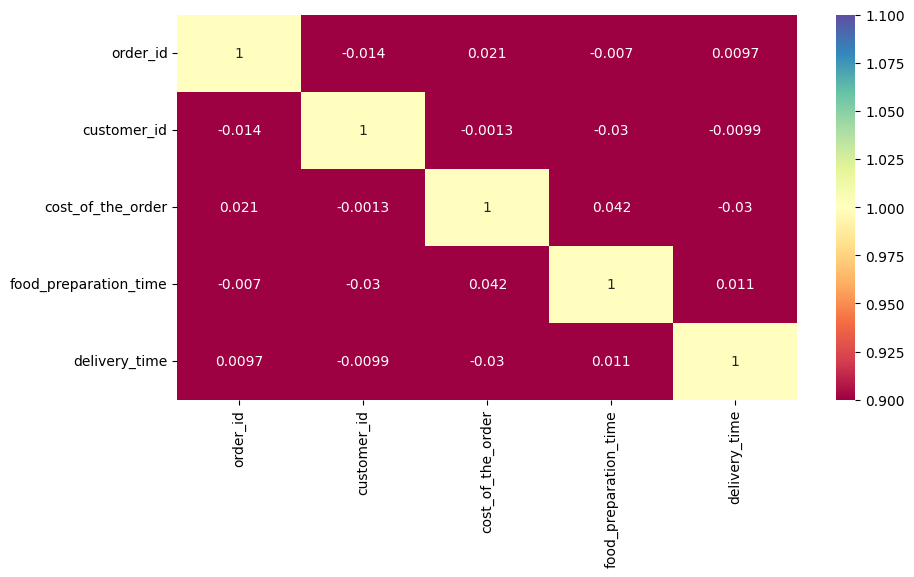

In [24]:
# Write the code here
plt.figure(figsize = (10,5))
sns.heatmap(df.select_dtypes(include = 'number').corr(), annot = True, cmap = 'Spectral', vmin = 1, vmax = 1)
plt.show()

# Observation:


*   According to the heatmap the correlation between variables is week.





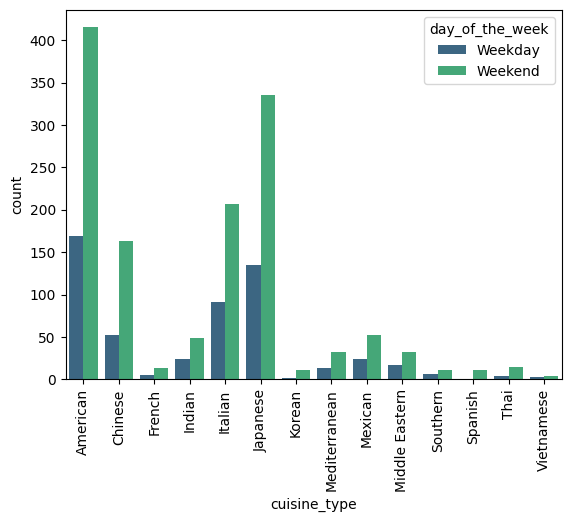

In [25]:
# This plot: Which cuisine type vs 'Weekend vs Weekday'
sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week', palette='viridis')
plt.xticks(rotation = 90)
plt.show()

# Observation:


*   We note a pattern of popularity of cuisine type that follows the same pattern according to the day of the week. However the demend is generally low during the weekdays.



/tmp/ipython-input-3568489396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'cost_of_the_order', y = 'cuisine_type', palette='Set2')


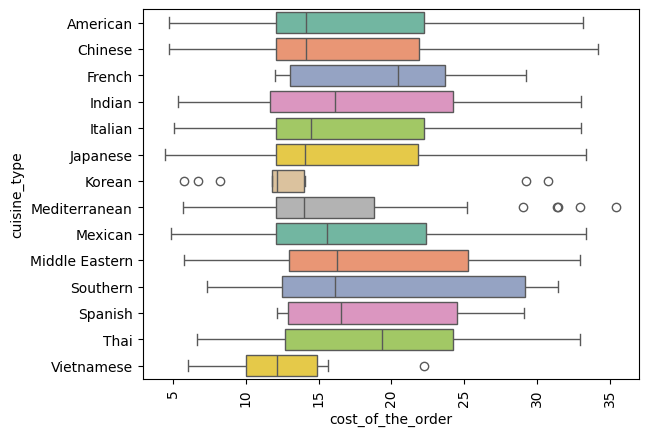

In [26]:
# Boxplot of cost_of_the_order vs Cuisine_type
sns.boxplot(data = df, x = 'cost_of_the_order', y = 'cuisine_type', palette='Set2')
plt.xticks(rotation = 90)
plt.show();

# Observation:


*   Most Cuisine have varying degrees of skewed costs with a few outliers such as Korean. Mediterranean and Vietnamese.



/tmp/ipython-input-4035941891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'day_of_the_week', y = 'cost_of_the_order', palette='dark')


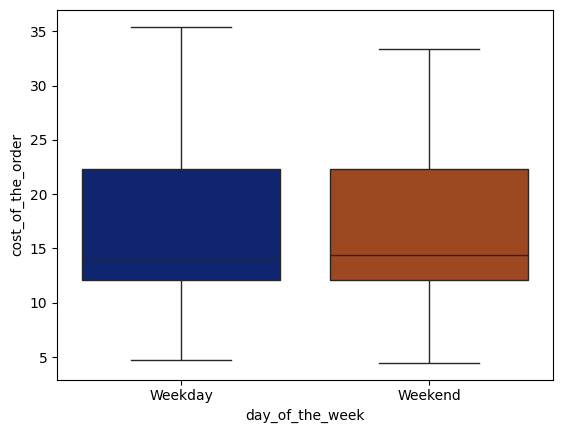

/tmp/ipython-input-4035941891.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'day_of_the_week', y = 'food_preparation_time', palette='mako')


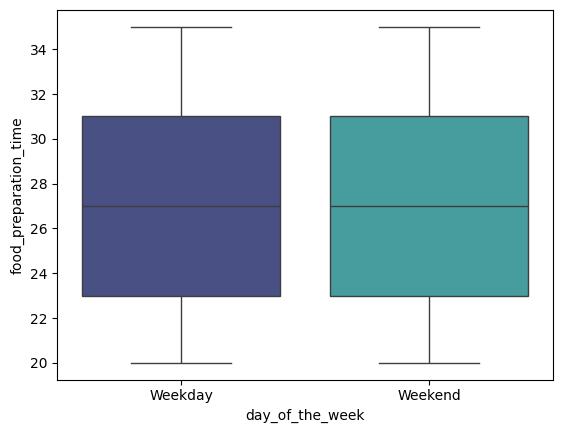

/tmp/ipython-input-4035941891.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'day_of_the_week', y = 'delivery_time', palette='coolwarm')


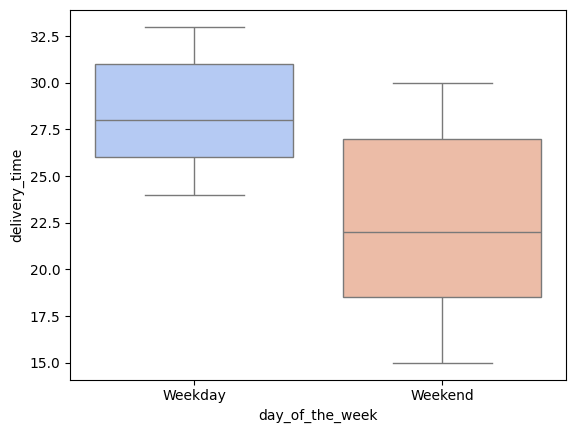

In [27]:
# Boxplot of day_of_the_week vs 'cost_of_the_year, food_preparation_time, and 'delivery_time'
sns.boxplot(data = df, x = 'day_of_the_week', y = 'cost_of_the_order', palette='dark')
plt.show()
sns.boxplot(data = df, x = 'day_of_the_week', y = 'food_preparation_time', palette='mako')
plt.show()
sns.boxplot(data = df, x = 'day_of_the_week', y = 'delivery_time', palette='coolwarm')
plt.show()

# Observation:


*  According to the three boxplot, their is steady spread of observations of the day of the week, except for the delivery time which generally takes longer during the weekdays than during the weekends. The medians delivery time for weekends is around 22.5 min, and the delivery time on weekdays is 28.5 min so it takes more time in the weekdays than the weekend even if weekend got the more deliveries.



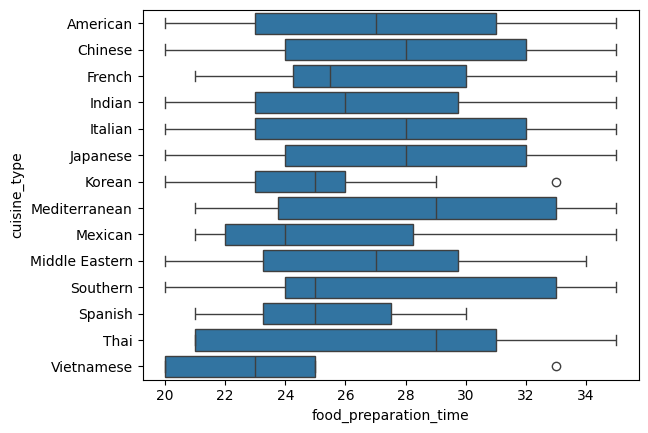

/tmp/ipython-input-2571444744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df, x = 'cuisine_type', y = 'food_preparation_time', kind = 'point',


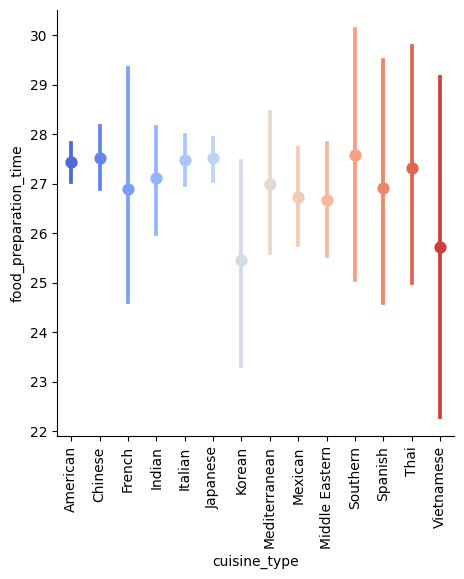

In [28]:
# Boxplot and catplot compares food_preparation_time vs cusine_type
sns.boxplot(data = df4, x = 'food_preparation_time', y = 'cuisine_type')
plt.show()
sns.catplot(data = df, x = 'cuisine_type', y = 'food_preparation_time', kind = 'point',
            palette='coolwarm')
plt.xticks(rotation = 90)
plt.show()

# Observation:


*   Most cuisine types have more or less the same average preparation time althrough some have a larger spread of the 95% CI.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [29]:
# Write the code here
# Ensure 'rating' is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Remove rows with missing ratings
df_valid = df[df['rating'].notna()]

# Group by restaurant to calculate mean rating and count
restaurant_stats = df_valid.groupby('restaurant_name').agg(
    mean_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

# Filter restaurants meeting promotional criteria
qualified_restaurants = restaurant_stats[
    (restaurant_stats['mean_rating'] > 4) &
    (restaurant_stats['rating_count'] > 50)
]

# Sort by mean rating (highest first)
qualified_restaurants = qualified_restaurants.sort_values(
    by='mean_rating', ascending=False
).reset_index(drop=True)

# Step 6: Display results
print(qualified_restaurants)

qualified_restaurants

             restaurant_name  mean_rating  rating_count
0          The Meatball Shop     4.511905            84
1  Blue Ribbon Fried Chicken     4.328125            64
2                Shake Shack     4.278195           133
3          Blue Ribbon Sushi     4.219178            73


/tmp/ipython-input-2822743296.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  restaurant_stats = df_valid.groupby('restaurant_name').agg(


,restaurant_name,mean_rating,rating_count
0,The Meatball Shop,4.511905,84
1,Blue Ribbon Fried Chicken,4.328125,64
2,Shake Shack,4.278195,133
3,Blue Ribbon Sushi,4.219178,73


#### Observations:

*   Four Resturants named Blue Ribbon Fried Chicken, Blue Ribbon Slushi, Shake Shack, and The Meatball Shop all qualify for the promotional offer.




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [30]:
# Write the code here
revenue1 = 0
income = 0
cost = pd.Series(df['cost_of_the_order'])

for i in range(len(cost)):
  if (cost[i] > 5) & (cost[i] <= 20):
    income = cost[i] * 0.15
  elif (cost[i] > 20):
    income = cost[i] * 0.25
  else:
    income = 0
  revenue1 = revenue1 + income

print('Net revenue generated is: ', round(revenue1, 2),
      'assuming no commission charged for orders with the cost below $5')


Net revenue generated is:  6166.3 assuming no commission charged for orders with the cost below $5


#### Observations:

*   Given the market differenition in price, FoodHub collected a total of $6166.3 for the orders given.




### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [31]:
# Write the code here
# We added a new column called 'total_prep_time'
df['total_prep_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_prep_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


In [32]:
total_observations = df['total_prep_time'].count()
ordertime_above60 = df['total_prep_time'][df['total_prep_time'] > 60].count()

percent_above60 = round((ordertime_above60 / total_observations) * 100, 2)
percent_above60

np.float64(10.54)

#### Observations:


*   About 10.54% of orders take more than 60 minutes to prepare and delivered.




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [33]:
# Write the code here
avr_del_time = df.groupby('day_of_the_week')[['delivery_time']].agg(['mean',
                                                                     'sum',
                                                                     'count',
                                                                     'std'])
avr_del_time

/tmp/ipython-input-932250287.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avr_del_time = df.groupby('day_of_the_week')[['delivery_time']].agg(['mean',


delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938

#### Observations:

*   The mean delivery time during the weekend is 22.47 min against the weekday's delivery time which is 28.34 min. This is very curious observation especially this chart that we reviewed against the count, which implies there are less orders over the weekdays compared to weekends. Probable explanation would be that their are high traffic during the weekdays than weekend.




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Ratings are clustered near the maximum score of 5, suggesting that mostly highly satisfied customers provide feedback. However, approximately 30% of orders are unrated, raising the question of whether these missing ratings could influence the overall score distribution.

Most orders are priced around forteen dollars, with a smaller peaked near twenty five dollars indicates a binomial distribtion in order costs.

The popularity of different cuisines follows a consistent pattern throughout the weekdays, although overall demand rises significantly on weekends.

Preparation time remains relatively stable, whereas delivery time shows greater variation, making it the main factor affecting the total time from order placement to customer delivery.

Four customers meet the proposed reward criteria, highlighting the need for further analysis to determine the best approach for handling this situation.








### Recommendations:

*  Improve the number of customers response rating with their orders, that is reducing the rating in the chart called 'Not given' on the order section. If it is possible entice them with a reward or follow up to know how your deilvery and food experence or service. This is will give the data a better pricture of how people are rating their food or if they like it or not?

*   The binomial peak of the cost of orders processed may imply to differenciated market segments, possibily the peak at fifteen dollars has a higher concentration of students and the peak of twenty five dollars having the higher focus of high adult professional who have a job. Need more analysis to get more accurate result.

*   Giving that consistant popularity across cuisines across the day of the week, better marketing can focus on those weekday period to boost sales.


*   To improve the total order time their should be a review on how to reduce delivery time which can result to better rating. A biggest question would be whether the higher delivery time is the cause of lower orders during the weekdays? A review is consider whether customers are ordering moe in weekdays because they have more avaliable time to order their food. Cosnider that on weekdays their are more traffic which results to higher delivery time on weekdays.

*   According to the promoitional offers the organization should consider a tie breaker for some of the customers so they don't have the same score issue. The decision will be required wither to reward all of those customers, this will be done by the finanical group. The factor should be distingush by which customer spends the most amount of money.










---